<a href="https://colab.research.google.com/github/demichie/Principles-of-Numerical-Modelling-in-Geosciences/blob/main/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4: Approximating Spatial Derivatives: The Finite Difference Method

In the preceding chapters, we focused on Ordinary Differential Equations (ODEs). However, many phenomena in the Earth sciences vary in both space and time, leading us to the realm of Partial Differential Equations (PDEs).

A crucial step in numerically solving PDEs is the ability to approximate spatial derivatives. This chapter introduces the foundational concepts of the **Finite Difference Method (FDM)** for spatial derivatives, focusing on their derivation via Taylor series expansions, their implementation in Python, and the analysis of their numerical accuracy.

## 4.1 From Time Derivatives to Spatial Derivatives: A Unified Concept

We have already used finite differences to discretize the time derivative $\frac{dy}{dt}$. For PDEs, we encounter derivatives with respect to spatial variables (e.g., $x$, $y$, $z$). The approach to approximating these is analogous:

1.  We establish a **spatial grid**, a set of discrete points (nodes) $x_0, x_1, \dots, x_i, \dots$ separated by a grid spacing $\Delta x$.
2.  We replace continuous spatial derivatives (e.g., $\frac{\partial \phi}{\partial x}$ at $x_i$) with algebraic formulas using the values of the function at these discrete grid points (e.g., $\phi_i = \phi(x_i)$, $\phi_{i+1} = \phi(x_{i+1})$).

This process is the essence of the Finite Difference Method.

## 4.2 The Finite Difference Method (FDM) for First Derivatives

Let's consider a function $q(x)$ on a uniform 1D grid. Our goal is to approximate the first derivative, $\left( \frac{dq}{dx} \right)_{x_i}$, at a generic grid point $x_i$.

### 4.2.1 Forward Difference Scheme
The **forward difference** approximation uses the current node $x_i$ and the next node "downstream", $x_{i+1}$.
$$
\left( \frac{dq}{dx} \right)_{x_i} \approx \frac{ q(x_{i}+\Delta x) - q(x_i)}{\Delta x} = \frac{ q_{i+1} - q_i }{\Delta x}
$$

### 4.2.2 Backward Difference Scheme
The **backward difference** approximation uses the current node $x_i$ and the previous node "upstream", $x_{i-1}$.
$$
\left( \frac{dq}{dx} \right)_{x_i} \approx \frac{ q(x_{i}) - q(x_i-\Delta x)}{\Delta x} = \frac{ q_{i} - q_{i-1} }{\Delta x}
$$

### 4.2.3 Central Difference Scheme
The **central difference** approximation uses values from nodes on both sides of $x_i$. It is typically more accurate.
$$
\left( \frac{dq}{dx} \right)_{x_i} \approx \frac{ q(x_{i+1}) - q(x_{i-1})}{2\Delta x} = \frac{ q_{i+1} - q_{i-1} }{2\Delta x}
$$

## 4.3 Accuracy of Finite Difference Schemes: Truncation Error

The difference between the true derivative and its finite difference approximation is known as the **truncation error**. It arises because these formulas are derived by truncating an infinite **Taylor series expansion**.

### 4.3.1 Taylor Series Expansion: The Foundation for Error Analysis
The Taylor series allows us to express the value of a function at a nearby point ($x_i + h$) using its value and derivatives at $x_i$:
$$
q(x_i + h) = q(x_i) + h \left( \frac{dq}{dx} \right)_{x_i} + \frac{h^2}{2!} \left( \frac{d^2q}{dx^2} \right)_{x_i} + \frac{h^3}{3!} \left( \frac{d^3q}{dx^3} \right)_{x_i} + \dots
$$
By rearranging this expansion, we can derive the finite difference formulas and, more importantly, quantify the error we make by truncating the series.

<div class="alert alert-block alert-info">
    <b>Concept Check!</b>
    <br>
    The Taylor series expresses $q(x_i+h)$ as a polynomial in $h$. If you differentiate this polynomial with respect to $h$ and then set $h=0$, what is the result? What if you do this $k$ times?
</div>

### 4.3.2 Truncation Error of the Schemes

By manipulating the Taylor series, we can find the error for each scheme.

- **Forward Difference:**
  $$ \frac{q_{i+1} - q_i}{\Delta x} = \left( \frac{dq}{dx} \right)_{x_i} + \underbrace{\frac{\Delta x}{2} \left( \frac{d^2q}{dx^2} \right)_{x_i} + \mathcal{O}(\Delta x^2)}_{\text{Truncation Error}} $$
  The leading error term is proportional to $\Delta x^1$, so the scheme is **first-order accurate**, $\mathcal{O}(\Delta x)$.

- **Backward Difference:**
  $$ \frac{q_i - q_{i-1}}{\Delta x} = \left( \frac{dq}{dx} \right)_{x_i} - \underbrace{\frac{\Delta x}{2} \left( \frac{d^2q}{dx^2} \right)_{x_i} + \mathcal{O}(\Delta x^2)}_{\text{Truncation Error}} $$
  This scheme is also **first-order accurate**, $\mathcal{O}(\Delta x)$.

- **Central Difference:**
  $$ \frac{q_{i+1} - q_{i-1}}{2\Delta x} = \left( \frac{dq}{dx} \right)_{x_i} + \underbrace{\frac{\Delta x^2}{6} \left( \frac{d^3q}{dx^3} \right)_{x_i} + \mathcal{O}(\Delta x^4)}_{\text{Truncation Error}} $$
  The leading error term is proportional to $\Delta x^2$, making the scheme **second-order accurate**, $\mathcal{O}(\Delta x^2)$. This means it generally converges to the true solution much faster as $\Delta x$ is reduced.

## 4.4 Practical Examples and Numerical Verification of Order

We can numerically verify these orders of accuracy by applying the schemes to functions with known analytical derivatives.

### 4.4.1 Printing Formatted Output in Python: f-strings
**f-strings** are a modern and convenient way to format strings in Python by embedding variables directly within curly braces `{}`.

In [1]:
rockType = "Granite"
sampleNumber = 12
porosity = 0.1537

# Embedding variables directly in the string
print(f"Sample {sampleNumber} is {rockType} with porosity {porosity}.")
# Output: Sample 12 is Granite with porosity 0.1537.

Sample 12 is Granite with porosity 0.1537.


In [2]:
dxValue = 0.1
fPrimeApprox = 1.90001234
errorValue = 0.09998765

print(f"For dx = {dxValue:.2f}: Approximation = {fPrimeApprox:.4f}, Error = {errorValue:.3e}")
# Expected Output:
# For dx = 0.10: Approximation = 1.9000, Error = 9.999e-02

For dx = 0.10: Approximation = 1.9000, Error = 9.999e-02


### 4.4.2 Example 1: Approximating the Derivative of $f(x) = x^2$
Let's approximate the derivative of $f(x) = x^2$ at $x_0 = 1.0$. The exact derivative is $f'(1.0) = 2.0$.

In [3]:
import numpy as np
# import matplotlib.pyplot as plt # Not strictly needed for this specific listing

# Define the function and its exact derivative
def functionXSquared(x):
    return x**2

def derivativeXSquared(x):
    return 2*x

# Point at which to evaluate the derivative
x0 = 1.0
# Step size
dxValue = 0.1

# Exact derivative value at x0
fPrimeExact = derivativeXSquared(x0)
print(f"Function: f(x) = x^2")
print(f"Exact derivative f'(x) = 2x")
print(f"Exact derivative at x = {x0}: {fPrimeExact:.4f}\n")

# Calculate function values needed for differences
fAtX0 = functionXSquared(x0)
fAtX0PlusDx = functionXSquared(x0 + dxValue)
fAtX0MinusDx = functionXSquared(x0 - dxValue)

# Forward Difference Approximation
fPrimeForward = (fAtX0PlusDx - fAtX0) / dxValue
errorForward = abs(fPrimeForward - fPrimeExact)
print(f"Forward Difference (dx = {dxValue:.2f}):")
print(f"  Approximation = {fPrimeForward:.4f}, Absolute Error = {errorForward:.4e}")

# Backward Difference Approximation
fPrimeBackward = (fAtX0 - fAtX0MinusDx) / dxValue
errorBackward = abs(fPrimeBackward - fPrimeExact)
print(f"\nBackward Difference (dx = {dxValue:.2f}):")
print(f"  Approximation = {fPrimeBackward:.4f}, Absolute Error = {errorBackward:.4e}")

# Central Difference Approximation
fPrimeCentral = (fAtX0PlusDx - fAtX0MinusDx) / (2 * dxValue)
errorCentral = abs(fPrimeCentral - fPrimeExact)
print(f"\nCentral Difference (dx = {dxValue:.2f}):")
print(f"  Approximation = {fPrimeCentral:.4f}, Absolute Error = {errorCentral:.4e}")

Function: f(x) = x^2
Exact derivative f'(x) = 2x
Exact derivative at x = 1.0: 2.0000

Forward Difference (dx = 0.10):
  Approximation = 2.1000, Absolute Error = 1.0000e-01

Backward Difference (dx = 0.10):
  Approximation = 1.9000, Absolute Error = 1.0000e-01

Central Difference (dx = 0.10):
  Approximation = 2.0000, Absolute Error = 4.4409e-16


The results are summarized in the table below. The exceptional accuracy of the central difference for $f(x)=x^2$ is because its leading error term depends on the third derivative, $f'''(x)$, which is zero for a quadratic function.

| Difference Scheme   | Approximation | Absolute Error        |
|---------------------|---------------|-----------------------|
| Forward Difference  | 2.1000        | $1.00 \times 10^{-1}$ |
| Backward Difference | 1.9000        | $1.00 \times 10^{-1}$ |
| Central Difference  | 2.0000        | $\approx 0$ (< 10⁻¹⁵) |

*Table: Finite difference approximations for the derivative of $f(x)=x^2$ at $x_0=1.0$ with $\Delta x = 0.1$.*

### 4.4.3 Example 2: Approximating the Derivative of $f(x) = \sin(x)$
Now, let's consider $f(x) = \sin(x)$. Its analytical derivative is $f'(x) = \cos(x)$. We will approximate the derivative at $x_0 = \pi/4$.

In [4]:
import numpy as np
# import matplotlib.pyplot as plt

# Define the function and its exact derivative
def functionSinX(x):
    return np.sin(x)

def derivativeSinX(x):
    return np.cos(x)

# Point at which to evaluate the derivative
x0Sin = np.pi / 4.0
# Step size
dxSin = 0.1

# Exact derivative value at x0Sin
fPrimeExactSin = derivativeSinX(x0Sin)
print(f"\nFunction: f(x) = sin(x)")
print(f"Exact derivative f'(x) = cos(x)")
print(f"Exact derivative at x = {x0Sin:.4f} (pi/4): {fPrimeExactSin:.6f}\n")

# Calculate function values
fAtX0Sin = functionSinX(x0Sin)
fAtX0PlusDxSin = functionSinX(x0Sin + dxSin)
fAtX0MinusDxSin = functionSinX(x0Sin - dxSin)

# Forward Difference
fPrimeForwardSin = (fAtX0PlusDxSin - fAtX0Sin) / dxSin
errorForwardSin = abs(fPrimeForwardSin - fPrimeExactSin)
print(f"Forward Difference (dx = {dxSin:.2f}):")
print(f"  Approximation = {fPrimeForwardSin:.6f}, Absolute Error = {errorForwardSin:.4e}")

# Backward Difference
fPrimeBackwardSin = (fAtX0Sin - fAtX0MinusDxSin) / dxSin
errorBackwardSin = abs(fPrimeBackwardSin - fPrimeExactSin)
print(f"\nBackward Difference (dx = {dxSin:.2f}):")
print(f"  Approximation = {fPrimeBackwardSin:.6f}, Absolute Error = {errorBackwardSin:.4e}")

# Central Difference
fPrimeCentralSin = (fAtX0PlusDxSin - fAtX0MinusDxSin) / (2 * dxSin)
errorCentralSin = abs(fPrimeCentralSin - fPrimeExactSin)
print(f"\nCentral Difference (dx = {dxSin:.2f}):")
print(f"  Approximation = {fPrimeCentralSin:.6f}, Absolute Error = {errorCentralSin:.4e}")


Function: f(x) = sin(x)
Exact derivative f'(x) = cos(x)
Exact derivative at x = 0.7854 (pi/4): 0.707107

Forward Difference (dx = 0.10):
  Approximation = 0.670603, Absolute Error = 3.6504e-02

Backward Difference (dx = 0.10):
  Approximation = 0.741255, Absolute Error = 3.4148e-02

Central Difference (dx = 0.10):
  Approximation = 0.705929, Absolute Error = 1.1779e-03


This more general example shows that while the central difference error is no longer zero (since $f'''(\sin x)$ is non-zero), it is still an order of magnitude more accurate than the first-order schemes.

| Difference Scheme   | Approximation | Absolute Error        |
|---------------------|---------------|-----------------------|
| Forward Difference  | 0.6706        | $3.65 \times 10^{-2}$ |
| Backward Difference | 0.7413        | $3.41 \times 10^{-2}$ |
| Central Difference  | 0.7059        | $1.18 \times 10^{-3}$ |

*Table: Finite difference approximations for the derivative of $f(x)=\sin(x)$ at $x_0=\pi/4$ with $\Delta x = 0.1$.*

### 4.4.4 Numerically Verifying the Order of Accuracy

If the error $E$ is proportional to $(\Delta x)^p$, then a plot of $\log(E)$ versus $\log(\Delta x)$ should be a straight line with slope $p$. This "log-log plot" is a standard way to verify the order of accuracy ($p$) of a numerical method. A slope of 1 indicates first-order accuracy, while a slope of 2 indicates second-order accuracy.

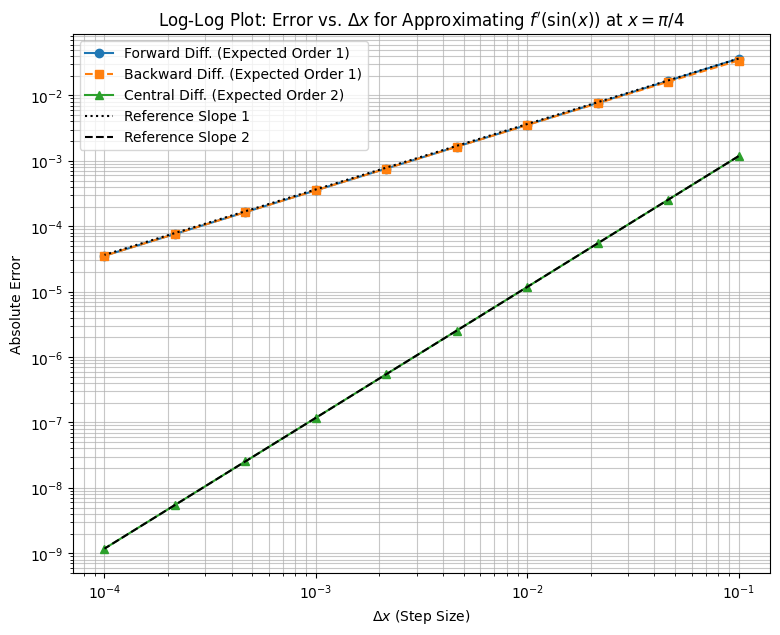

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function and its derivative (defined in a previous cell)
# def functionSinX(x): return np.sin(x)
# def derivativeSinX(x): return np.cos(x)

x0Order = np.pi / 4.0
fPrimeExactOrder = derivativeSinX(x0Order)

# Range of dx values, decreasing logarithmically
# Example: 10 points from 10^-1 down to 10^-4
dxValues = np.logspace(-1, -4, 10)

errorsForwardOrder = []
errorsBackwardOrder = []
errorsCentralOrder = []

for dxCurr in dxValues:
    f0 = functionSinX(x0Order)
    fPlus = functionSinX(x0Order + dxCurr)
    fMinus = functionSinX(x0Order - dxCurr)

    # Forward difference error
    approxFwd = (fPlus - f0) / dxCurr
    errorsForwardOrder.append(abs(approxFwd - fPrimeExactOrder))

    # Backward difference error
    approxBwd = (f0 - fMinus) / dxCurr
    errorsBackwardOrder.append(abs(approxBwd - fPrimeExactOrder))

    # Central difference error
    approxCtrl = (fPlus - fMinus) / (2 * dxCurr)
    errorsCentralOrder.append(abs(approxCtrl - fPrimeExactOrder))

# Convert lists to NumPy arrays for plotting and calculations
errorsForwardOrder = np.array(errorsForwardOrder)
errorsBackwardOrder = np.array(errorsBackwardOrder)
errorsCentralOrder = np.array(errorsCentralOrder)

# Create the log-log plot
plt.figure(figsize=(9, 7))
plt.loglog(dxValues, errorsForwardOrder, 'o-', label='Forward Diff. (Expected Order 1)')
plt.loglog(dxValues, errorsBackwardOrder, 's--', label='Backward Diff. (Expected Order 1)')
plt.loglog(dxValues, errorsCentralOrder, '^-', label='Central Diff. (Expected Order 2)')

# Add reference lines for slopes to guide the eye
# For Order 1: Error = C * dx^1. Choose C such that C*dxValues[0] approx errors[0]
if len(dxValues) > 0 and len(errorsForwardOrder) > 0:
    C1 = errorsForwardOrder[0] / dxValues[0]
    plt.loglog(dxValues, C1 * dxValues**1, 'k:', lw=1.5, label='Reference Slope 1')
# For Order 2: Error = C * dx^2
if len(dxValues) > 0 and len(errorsCentralOrder) > 0:
    C2 = errorsCentralOrder[0] / (dxValues[0]**2)
    plt.loglog(dxValues, C2 * dxValues**2, 'k--', lw=1.5, label='Reference Slope 2')

plt.xlabel('$\Delta x$ (Step Size)')
plt.ylabel('Absolute Error')
plt.title('Log-Log Plot: Error vs. $\Delta x$ for Approximating $f\'(\sin(x))$ at $x=\pi/4$')
plt.legend(loc='best')
plt.grid(True, which="both", ls="-", alpha=0.7) # Grid for both major and minor ticks
# plt.gca().invert_xaxis() # Optional: if you prefer dx decreasing to the right
plt.show()

The resulting log-log plot clearly shows that the errors for the forward and backward schemes align with a line of slope 1, while the errors for the central difference scheme align with a steeper line of slope 2, numerically confirming their theoretical orders of accuracy.

<div class="alert alert-block alert-info">
    <b>Concept Check!</b>
    <br>
    On a log-log plot of error versus step size, Scheme A shows a slope of 1, while Scheme B shows a slope of 2. If your goal is to achieve a very small error, which scheme is more efficient (i.e., requires a larger $\Delta x$ for the same error)? Why?
</div>

## Chapter Summary and Exercises
This chapter introduced the Finite Difference Method for approximating spatial derivatives, a fundamental skill for solving PDEs. We derived forward, backward, and central difference schemes, analyzed their accuracy using Taylor series, and numerically verified their order of accuracy in Python.

## Chapter 4 Exercises

Apply your understanding of the concepts and methods discussed in this chapter to solve the following problems.

### E4.1: Derivative of a Cubic Function

Consider the function $f(x) = x^3 - 2x^2 + 5$.

**Tasks:**
1.  **Analytical Derivative:** Find the analytical (exact) first derivative, $f'(x)$.
2.  **Implementation:** Write a Python script that calculates the forward, backward, and central difference approximations for $f'(x)$ at the point $x_0 = 2.0$.
3.  **Error Calculation:** Use a step size of $\Delta x = 0.05$. Calculate the absolute error for each of the three schemes by comparing the numerical approximation to the exact value of the derivative at $x_0 = 2.0$.
4.  **Print Results:** Print the results in a clear, formatted way, similar to the examples in the chapter.

In [ ]:
# Your code for Exercise 4.1 here
import numpy as np

# 1. Define the function and its analytical derivative
def cubic_function(x):
    # Your code here
    return 0

def derivative_cubic_function(x):
    # Your code here
    return 0

# 2. Setup parameters
x0 = 2.0
dx = 0.05

# 3. Calculate exact value
f_prime_exact = derivative_cubic_function(x0)
print(f"Function: f(x) = x^3 - 2x^2 + 5")
print(f"Exact derivative at x = {x0}: {f_prime_exact}\n")

# Calculate function values at required points
# ...

# 4. Calculate and print approximations and errors
# Forward Difference
# ...

# Backward Difference
# ...

# Central Difference
# ...

### E4.2: Impact of the Evaluation Point

Using the same function from the previous exercise, $f(x) = x^3 - 2x^2 + 5$, now approximate the derivative at a different point, $x_0 = 2/3$. The exact derivative at this point is $f'(2/3) = 3(2/3)^2 - 4(2/3) = 4/3 - 8/3 = -4/3$.

**Tasks:**
1.  **Recalculate:** Modify your script from E4.1 to calculate the three finite difference approximations and their absolute errors at this new point, $x_0 = 2/3$, using the same step size $\Delta x = 0.05$.
2.  **Compare and Discuss:** Compare the absolute errors you calculated at $x_0 = 2/3$ with those you calculated at $x_0 = 2.0$. Are they the same? In a markdown cell, briefly explain why the errors might be different, even though you are using the same function and the same $\Delta x$. (Hint: Look at the leading error term for each scheme. What other part of the function, besides $\Delta x$, does the error depend on?)

In [ ]:
# Your code for Exercise 4.2 here
import numpy as np

# (You can reuse the functions from the previous exercise)

# 1. Setup new parameters
x0_new = 2.0 / 3.0
dx_new = 0.05

# Calculate exact value at the new point
f_prime_exact_new = derivative_cubic_function(x0_new)
print(f"Exact derivative at x = {x0_new:.4f}: {f_prime_exact_new:.4f}\n")

# ... rest of your code to calculate and print approximations and errors ...

*Your discussion for E4.2, Task 2 here. Double-click to edit.*

...

### E4.3: Numerical Verification of Order for a Different Function

Let's numerically verify the order of accuracy for the finite difference schemes using a new function, $f(x) = e^{-x} \cos(x)$. The analytical derivative is $f'(x) = -e^{-x}(\cos(x) + \sin(x))$.

**Tasks:**
1.  **Implementation:** Write a Python script that calculates the absolute error of the forward, backward, and central difference approximations for $f'(x)$ at $x_0 = 0$.
2.  **Vary Step Size:** Calculate these errors for a range of $\Delta x$ values (e.g., using `np.logspace(-1, -5, 15)` to get 15 steps between $10^{-1}$ and $10^{-5}$).
3.  **Log-Log Plot:** Create a log-log plot of the absolute error versus $\Delta x$ for all three schemes.
4.  **Analyze:** Add reference lines with slopes of 1 and 2 to your plot. Confirm that the numerical results match the theoretical orders of accuracy for each scheme.

In [ ]:
# Your code for Exercise 4.3 here
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the new function and its derivative
def exp_cos_func(x):
    return np.exp(-x) * np.cos(x)

def derivative_exp_cos_func(x):
    return -np.exp(-x) * (np.cos(x) + np.sin(x))

# Setup parameters
x0_verify = 0.0
f_prime_exact_verify = derivative_exp_cos_func(x0_verify)

# 2. Create a range of dx values
dx_values_verify = np.logspace(-1, -5, 15)
errors_fwd = []
errors_bwd = []
errors_ctrl = []

# Loop through dx values and calculate errors
for dx in dx_values_verify:
    # ... your code to calculate approximations and errors ...
    pass # remove this line

# 3. Create the log-log plot
plt.figure(figsize=(10, 8))
# ... your plotting code here ...

# 4. Add reference lines
# ... your code to add reference lines ...

plt.xlabel("Step Size (dx)")
plt.ylabel("Absolute Error")
plt.title("Order of Accuracy for $f(x) = e^{-x} \cos(x)$ at $x_0=0$")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

### E4.4: Approximating the Second Derivative

The same Taylor series approach can be used to derive approximations for higher-order derivatives. To approximate the second derivative, $\frac{d^2q}{dx^2}$, at a point $x_i$, we can add the Taylor series expansions for $q(x_{i+1})$ and $q(x_{i-1})$.

Starting with:
$$ q_{i+1} = q_i + \Delta x q'_i + \frac{\Delta x^2}{2} q''_i + \frac{\Delta x^3}{6} q'''_i + \mathcal{O}(\Delta x^4) $$
$$ q_{i-1} = q_i - \Delta x q'_i + \frac{\Delta x^2}{2} q''_i - \frac{\Delta x^3}{6} q'''_i + \mathcal{O}(\Delta x^4) $$

**Tasks:**
1.  **Derivation:** Add these two equations together and rearrange the result to solve for $q''_i = \left(\frac{d^2q}{dx^2}\right)_{x_i}$. This will give you the standard central difference formula for the second derivative.
2.  **Truncation Error:** What is the leading term of the truncation error for your derived formula? What is the order of accuracy of this scheme?
3.  **Implementation:** Apply your formula to find the second derivative of $f(x) = \sin(2x)$ at $x_0 = \pi/4$. The exact second derivative is $f''(x) = -4\sin(2x)$, so $f''(\pi/4) = -4\sin(\pi/2) = -4$. Use $\Delta x = 0.1$ and calculate the absolute error of your approximation.

*Your derivation for E4.4, Task 1 & 2 here. Double-click to edit.*

**1. Derivation:**
Adding the two Taylor series gives:
$$ q_{i+1} + q_{i-1} = 2q_i + \Delta x^2 q''_i + \mathcal{O}(\Delta x^4) $$
Rearranging for $q''_i$:
$$ ... $$

**2. Truncation Error:**
The leading error term is proportional to ... , so the method is ... -order accurate.

In [ ]:
# Your code for Exercise 4.4, Task 3 here
import numpy as np

def f_sin2x(x):
    return np.sin(2 * x)

def f_dd_sin2x(x): # second derivative
    return -4 * np.sin(2 * x)

# Parameters
x0_dd = np.pi / 4.0
dx_dd = 0.1

# Exact value
exact_dd = f_dd_sin2x(x0_dd)
print(f"Exact second derivative at x={x0_dd:.4f} is {exact_dd:.4f}\n")

# Calculate required function values
# ...

# Apply the central difference formula for the second derivative
# ...

# Print the approximation and the absolute error
# ...